[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error (MSE): 10.7
Mean Absolute Error (MAE): 2.8
Root Mean Squared Error (RMSE): 3.3
Predicted closing price for tomorrow: $500.87


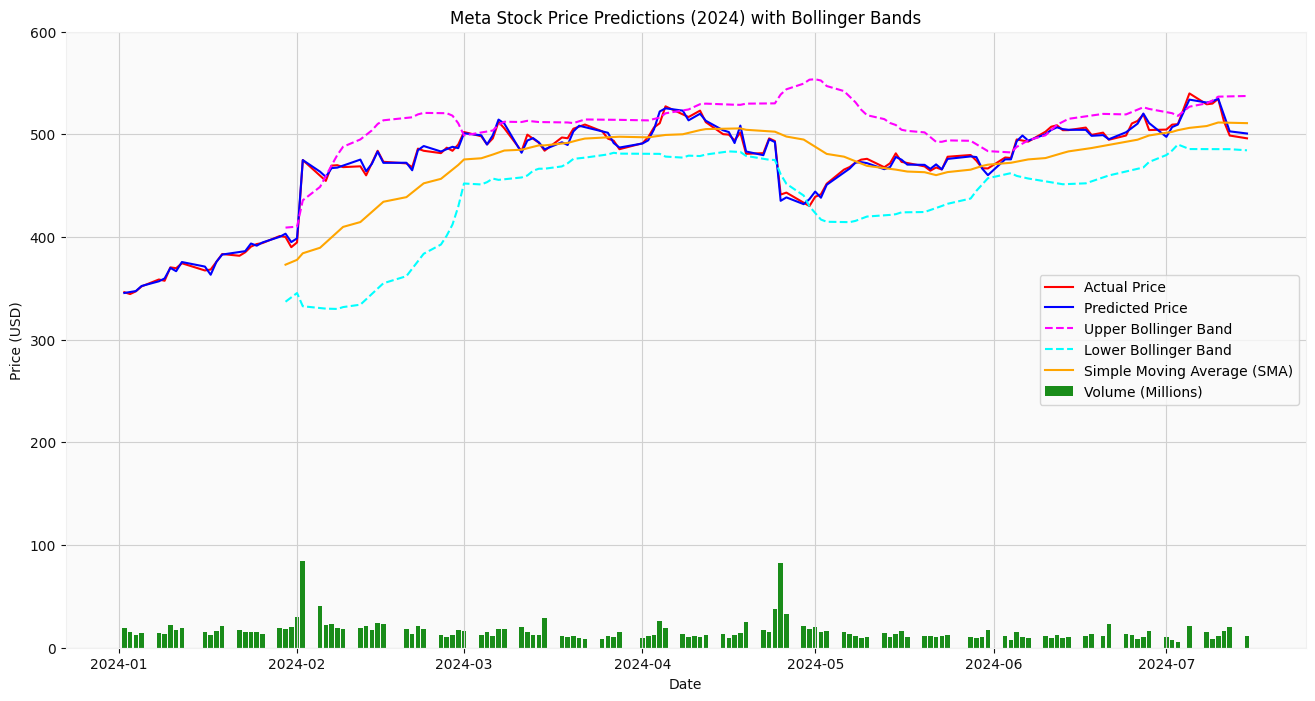

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  351.320007  353.160004  340.010010  346.290009  345.579865   
2024-01-03  344.980011  347.950012  343.179993  344.470001  343.763580   
2024-01-04  344.500000  348.149994  343.399994  347.119995  346.408142   
2024-01-05  346.989990  353.500000  346.260010  351.950012  351.228271   
2024-01-08  354.700012  358.980011  352.049988  358.660004  357.924500   
...                ...         ...         ...         ...         ...   
2024-07-09  533.750000  537.479980  528.190002  530.000000  530.000000   
2024-07-10  530.789978  538.880005  528.359985  534.690002  534.690002   
2024-07-11  530.890015  535.460022  508.369995  512.700012  512.700012   
2024-07-12  497.760010  508.089996  494.230011  498.869995  498.869995   
2024-07-15  498.640015  506.679901  493.369995  496.160004  496.160004   

              Volume         SMA     

,Open,High,Low,Close,Adj Close,Volume,SMA,Upper,Lower
count,134.000000,134.000000,134.000000,134.000000,134.000000,1.340000e+02,115.000000,115.000000,115.000000
mean,469.484776,475.577611,463.916119,470.151120,469.650790,1.617286e+07,475.410366,511.076314,439.744418
std,48.248873,48.562353,47.000198,47.481960,47.632920,1.010257e+07,32.385334,25.737748,46.883635
min,344.500000,347.950012,340.010010,344.470001,343.763580,6.005600e+06,373.102002,409.200308,329.969566
25%,463.402496,469.487495,455.362495,465.704994,465.243057,1.124432e+07,465.672003,503.255047,421.069903
50%,484.725006,491.375000,477.990005,484.024994,483.325104,1.351910e+07,484.278998,514.532549,456.228696
75%,501.917503,507.234993,495.427498,501.774994,501.600578,1.842540e+07,497.913752,525.599508,477.373974
max,542.349976,542.809998,528.359985,539.909973,539.909973,8.461550e+07,511.843500,553.701617,490.169071


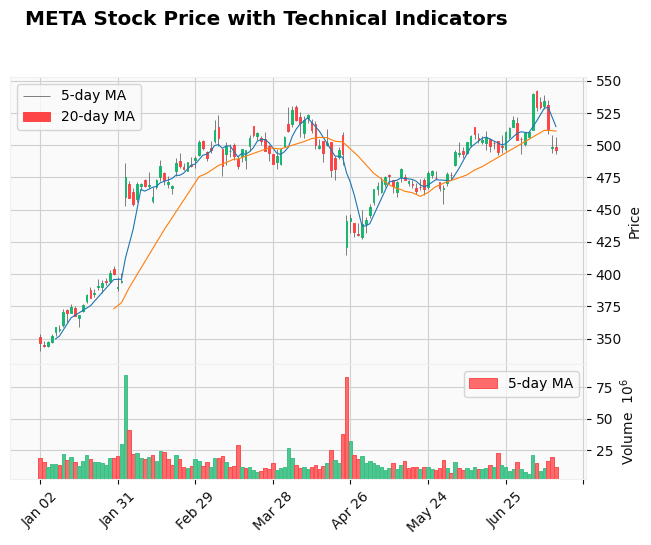

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as mp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import mplfinance as mpf
from matplotlib.pyplot import legend


# This is the symbol and range value:::::
symbol = "META"
start_date = "2024-01-01"
end_date = "2024-07-16"






# Code to Download historical data::::::
meta_data = yf.download(symbol, start=start_date, end=end_date)







# THIS code Fills the missing values with the average of existing data:::::::::

meta_data.fillna(meta_data.mean(), inplace=True)
# The inplace=True updates the DataFrame directly).







# Features required to predict and analyse::::::

features = ['Open', 'High', 'Low', 'Volume']
# using indexing and slicing




# Code to conduct Train-test split::::

X_train, X_test, y_train, y_test = train_test_split(meta_data[features], meta_data['Close'], test_size=0.2,random_state=116)
# y_test: This represents the actual target values for testing
# y_train: This represents the actual target values for training
# X_train: The features for training
# X_test: The features for testing






# Building and training linear regression mode::::
model = LinearRegression()
model.fit(X_train, y_train)





# Evaluation of the model::::
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# y_test: This represents the actual target values
# y_pred: This represents the predicted target values generated by regression model
# false because it will return root of mse or else it will give mse directly








# Printing the evaluated values with 1 decimal place::::::
print(f"Mean Squared Error (MSE): {mse:.1f}")
print(f"Mean Absolute Error (MAE): {mae:.1f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.1f}")






# Code for Calculating Bollinger Bands::::


window = 20
# this represents number of data points used to calculate moving averages


meta_data['SMA'] = meta_data['Close'].rolling(window=window).mean()
# here SMA = simple moving average
# close refers to closing price of stock
# .mean() claculates SMA over rolling window for closing prices
# rolling window is created of size 20


meta_data['Upper'] = meta_data['SMA'] + 2 * meta_data['Close'].rolling(window=window).std()
# here we do [SMA + 2*] the rolling STD to get upper band


meta_data['Lower'] = meta_data['SMA'] - 2 * meta_data['Close'].rolling(window=window).std()
# here we do [SMA - 2*] the rolling STD to get the lower band


# these bands help visualize potential overbought or oversold conditions in the stockprice
# it means when the prices moves close to the upper band it may be overbought
# and when it approaches lower band it may be oversold
# traders use this to identify potential price reversals or volatility changes







# Code to Extract the latest data ::::::

latest_data = meta_data.iloc[-1]
# The variable latest_data now holds the data for the most recent day (today) in the historical stock data.
# meta_data.iloc[-1] selects the entire last row (latest data) from the DataFrame








# Code to Predict tomorrow's closing price:::::::


predicted_tomorrow_price = model.predict([[latest_data['Open'], latest_data['High'], latest_data['Low'], latest_data['Volume']]])[0]
# model refers to the trained linear regression model
# predict() is a method of the model that predicts the target variable (the closing price) based on input features
# The input features are provided as a 2D array , Each inner array contains the feature values for a single data point
# latest_data['Open']: The opening price for the latest trading day
# latest_data['Low']: The lowest price during the latest trading day
# latest_data['Volume']: The trading volume during the latest trading day
# The predict() method returns an array of predicted values (in this case a single value is given for tomorrow’s closing price)
# we use [0] to extract the first element from that array




# Printing predicted closing price with 2 decimals ::::::
print(f"Predicted closing price for tomorrow: ${predicted_tomorrow_price:.2f}")



# Creates a single plot:::::::
plt.figure(figsize=(16, 8))






# This code Plots actual closing prices and predicted prices::::::::


plt.plot(meta_data.index, meta_data['Close'], color='red', label='Actual Price')
# This line plots the actual closing prices (meta_data['Close']) against the date index (meta_data.index)


plt.plot(meta_data.index, model.predict(meta_data[features]), color='blue', label='Predicted Price')
# This line plots the predicted closing prices (based on the trained linear regression model) against the date index


plt.bar(meta_data.index, meta_data['Volume'] / 1e6, alpha=0.9, color='green', label='Volume (Millions)')
# This line creates a bar graph for the trading volume (meta_data['Volume']) against the date index
# The volume values are divided by 1 million (/ 1e6) to make the bars more visually understandable








# This Plots Bollinger Bands:::::::::


plt.plot(meta_data.index, meta_data['Upper'], color='magenta', linestyle='--', label='Upper Bollinger Band')
# This line plots the upper Bollinger Band against the date index

plt.plot(meta_data.index, meta_data['Lower'], color='cyan', linestyle='--', label='Lower Bollinger Band')
# this line plots the lower Bollinger Band against the date index

plt.plot(meta_data.index, meta_data['SMA'], color='orange', linestyle='-', label='Simple Moving Average (SMA)')
# This line plots the Simple Moving Average (SMA) against the date index







# This code is for labeling:::::::
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Meta Stock Price Predictions (2024) with Bollinger Bands')
plt.ylim(0,600)
plt.legend()
plt.grid(True)
plt.show()






# this plots candlestick graph::::::

mav_tuple = (5, 20)
# These represent the periods for the moving averages

mav_titles = ['5-day MA', '20-day MA']
# contains the titles for the moving averages: ‘5-day MA’ and ‘20-day MA

fig, axes = mpf.plot(meta_data, type='candle', mav=mav_tuple, volume=True,
                     title='META Stock Price with Technical Indicators',
                     style='yahoo', returnfig=True)

# The mpf.plot() function is used to create a candlestick chart for the stock data stored in meta_data
# The type='candle' specifies that we want a candlestick chart
# The 'mav' argument specifies the moving averages to be plotted on the chart
# The volume=True argument indicates that we want to include volume bars on the chart
# The style='yahoo' argument specifies the style of the chart
# The returnfig=True argument returns the figure and axes objects


for ax in axes:
    ax.legend(mav_titles)
# for ax in axes: loop iterates over each subplot (axes) in the figure
# ax.legend(mav_titles) line adds legends to each subplot, displaying the moving average titles





print(meta_data)
meta_data
meta_data.describe()



In [ ]:
pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00
